In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import os
# import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/Users/sachaura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of channels
img_channels = 1

In [3]:
path1 = '/home/saumya/Desktop/Telugu/telgu_dataset'    #path of folder of images
data_path = '/Users/sachaura/Documents/nm/ThesisWork/Devanagari/devnagari/'    #path of folder of images

# listing = os.listdir(path1) 
# num_samples=size(listing)
# print (num_samples)
#for file in listing:
    #im = Image.open(path1 + '/' + file)  
    #img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')
                #need to do some more processing here          
    #gray.save(path2 +'/' +  file, "bmp")

imlist = os.listdir(data_path)
data_dir_list = os.listdir(data_path)

In [4]:
im1 = array(Image.open('/Users/sachaura/Documents/nm/ThesisWork/Devanagari/devnagari' + '/'+ imlist[4])) # open one image to get size
m,n = im1.shape[0:2]# get the size of the images
print(m,n)
imnbr = len(imlist) # get the number of images

IsADirectoryError: [Errno 21] Is a directory: '/Users/sachaura/Documents/nm/ThesisWork/Devanagari/devnagari/3'

In [5]:
num_channel=1
num_epoch=1

# Define the number of classes
print(data_path)

img_data_list=[]
for dataset in data_dir_list:
    if(dataset != ".DS_Store"):
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(28,28))
            img_data_list.append(input_img_resize)


# for dataset in data_dir_list:
# # 	img_list=os.listdir(data_path+'/'+ dataset)
# # 	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
# # 	for img in dir_list:
# 	input_img=cv2.imread(data_path + '/'+ dataset )
# 	input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
# 	input_img_resize=cv2.resize(input_img,(28,28))
# 	img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
num_classes = 10

num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')

/Users/sachaura/Documents/nm/ThesisWork/Devanagari/devnagari/
Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9

(18794, 28, 28)
(18794, 1, 28, 28)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


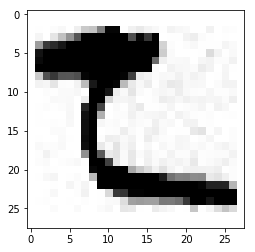

In [6]:
# # create matrix to store all flattened images
# immatrix = array([array(Image.open('/home/saumya/Desktop/Telugu/t' + '/'+  im2)).flatten()
#               for im2 in imlist],'f')
# #print(immatrix)
# num_class=10
               
# label=np.ones((num_samples,),dtype = int)
label[1:1843]=0
label[1843:3735]=1
label[3735:5627]=2
label[5627:7510]=3
label[7510:9387]=4
label[9387:11277]=5
label[11277:13147]=6
label[13147:15017]=7
label[15017:16905]=8
label[16905:18794]=9

names = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# Y = np_utils.to_categorical(label, num_class)
# data,Label = shuffle(immatrix,Y, random_state=2)
# train_data = [data,Label]
# np.savetxt('/home/saumya/Desktop/svm_input_data/ny_test.csv', Label, delimiter = ',') 
# img=immatrix[17].reshape(img_rows,img_cols)
# plt.imshow(img)
# plt.show()

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, num_classes)
print(Y)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

i = 67
plt.imshow(X_train[i, 0], interpolation='nearest', cmap = 'gray')
print("label : ", y_train[i,:])


input_shape=img_data[0].shape

In [7]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, name = 'first_dense_layer'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [8]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 26, 26)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 11, 11)        18496     
__________

True

In [9]:

# Training
hist = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/Users/sachaura/anaconda3/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 15035 samples, validate on 3759 samples
Epoch 1/10
15035/15035 [==============================] - 83s - loss: 1.3546 - acc: 0.5393 - val_loss: 0.4127 - val_acc: 0.8835
Epoch 2/10
15035/15035 [==============================] - 100s - loss: 0.5612 - acc: 0.8225 - val_loss: 0.2098 - val_acc: 0.9388
Epoch 3/10
15035/15035 [==============================] - 106s - loss: 0.3839 - acc: 0.8819 - val_loss: 0.1461 - val_acc: 0.9604
Epoch 4/10
15035/15035 [==============================] - 113s - loss: 0.2981 - acc: 0.9102 - val_loss: 0.1302 - val_acc: 0.9646
Epoch 5/10
15035/15035 [==============================] - 141s - loss: 0.2535 - acc: 0.9244 - val_loss: 0.0901 - val_acc: 0.9753
Epoch 6/10
15035/15035 [==============================] - 169s - loss: 0.2196 - acc: 0.9344 - val_loss: 0.0719 - val_acc: 0.9790
Epoch 7/10
15035/15035 [==============================] - 158s - loss: 0.1976 - acc: 0.9409 - val_loss: 0.0752 - val_acc: 0.9785
Epoch 8/10
15035/15035 [=========================

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04885393914690548
Test accuracy: 0.9856344772704455


TypeError: Image data cannot be converted to float

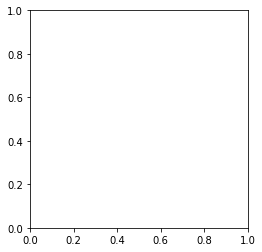

In [58]:
# Testing a new image
test_image = cv2.imread('/home/saumya/Desktop/Telugu/0/232.bmp')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)

test_image = X_test[120:121]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[120:121])

(1, 1, 28, 28)
[[1.4203087e-04 3.6270422e-04 3.9126116e-05 2.2848553e-06 1.3487263e-03
  8.0176824e-07 8.3235855e-06 9.7070799e-05 9.9798441e-01 1.4507802e-05]]
1/1 [==============================] - 0s
[8]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
# print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

    class 0       0.99      1.00      0.99       388
    class 1       0.97      0.99      0.98       390
    class 2       0.99      0.99      0.99       354
    class 3       0.99      0.98      0.99       383
    class 4       0.99      0.99      0.99       388
    class 5       0.99      0.99      0.99       373
    class 6       0.97      0.98      0.97       358
    class 7       0.98      0.99      0.99       382
    class 8       0.99      0.99      0.99       355
    class 9       0.99      0.96      0.98       388

avg / total       0.99      0.99      0.99      3759

[[388   0   0   0   0   0   0   0   0   0]
 [  1 386   0   0   1   0   0   0   2   0]
 [  0   1 350   2   0   0   0   0   1   0]
 [  0   0   3 376   1   0   0   0   0   3]
 [  0   2   0   0 384   0   2   0   0   0]
 [  0   1   1   0   1 369   0   1   0   0]
 [  0   0   0   0   2   1 350   5   0   0]
 [  1   1   0   0   0   0   0 380   0   0]
 [  1   2   0   0

Confusion matrix, without normalization
[[388   0   0   0   0   0   0   0   0   0]
 [  1 386   0   0   1   0   0   0   2   0]
 [  0   1 350   2   0   0   0   0   1   0]
 [  0   0   3 376   1   0   0   0   0   3]
 [  0   2   0   0 384   0   2   0   0   0]
 [  0   1   1   0   1 369   0   1   0   0]
 [  0   0   0   0   2   1 350   5   0   0]
 [  1   1   0   0   0   0   0 380   0   0]
 [  1   2   0   0   0   1   1   0 350   0]
 [  1   3   1   0   0   0   8   1   1 373]]


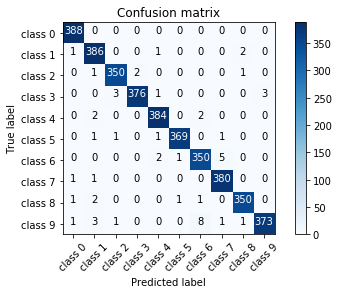

In [16]:
import matplotlib.pyplot as plt
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [17]:
import numpy
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from cv2 import CV_64F
K.set_image_dim_ordering('th')

In [35]:
model_dense_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x_train = model_dense_layer_output.predict(X_train)
svm_x_test = model_dense_layer_output.predict(X_test)
svm_y_train = np.array([x[0] for x in y_train])
svm_y_test = np.array([x[0] for x in y_test])

np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_train.csv', svm_x_train, delimiter = ',') 
np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_train.csv', svm_y_train, delimiter = ',') 
np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_test.csv', svm_x_test, delimiter = ',') 
np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_test.csv', svm_y_test, delimiter = ',') 

print(svm_x_train)

/home/saumya/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`
  """Entry point for launching an IPython kernel.


[[-2.71 -1.96 -1.75 ...,  4.16  3.3  -1.1 ]
 [ 2.11 -1.5   1.   ...,  0.59 -4.52 -1.08]
 [-2.77  1.23 -1.23 ...,  1.38 -3.68 -0.95]
 ..., 
 [ 0.73 -1.24 -0.35 ...,  0.9  -3.13  2.38]
 [-1.41 -1.41 -3.01 ...,  2.6  -2.37  2.78]
 [-1.65 -0.54  0.41 ...,  2.35  1.26  1.45]]


In [24]:
model_dense_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x_train = model_dense_layer_output.predict(X_train)
svm_x_test = model_dense_layer_output.predict(X_test)
# svm_y_train = np.array([x[0] for x in y_train])
svm_y_train = model.predict_classes(X_train)
svm_y_test = model.predict_classes(X_test)

print(svm_x_train)

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`
  """Entry point for launching an IPython kernel.


3744/3759 [============================>.] - ETA: 0s[[-1.01 -1.75 -0.89 ... -1.99 -1.39  2.69]
 [-1.78 -1.44  3.99 ... -3.01 -2.5   3.99]
 [ 1.48  2.77  1.63 ... -1.69 -1.68 -2.15]
 ...
 [ 2.28  5.37  0.44 ... -3.06 -2.62 -3.36]
 [-0.95  1.15 -2.08 ... -1.76 -2.28  1.67]
 [ 2.9   2.74 -0.97 ... -1.51 -1.54 -2.63]]


In [25]:
from cv2 import CV_64F
import cv2
from sklearn import svm
from sklearn import metrics
import random
import json
from keras.models import model_from_json

from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = svm.LinearSVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

[[389   0   1   0   0   0   0   1   1   0]
 [  0 392   0   0   1   1   0   0   2   0]
 [  0   1 349   2   0   2   0   0   0   1]
 [  1   0   5 370   0   0   0   1   0   1]
 [  0   0   1   0 387   0   1   0   0   0]
 [  0   0   1   1   1 366   1   1   0   0]
 [  0   3   0   0   0   0 354   1   1   2]
 [  0   0   0   1   1   0   1 383   0   1]
 [  1   0   1   0   0   0   0   0 352   0]
 [  0   0   1   2   0   0   0   0   0 373]]
Accuracy:  0.98829475924448


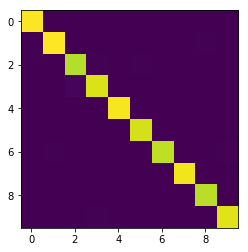

In [27]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
cm = metrics.confusion_matrix(svm_y_test, y_predicted)
print(cm)
plt.imshow(cm)
print("Accuracy: ",accuracy)

In [28]:
clf = svm.SVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

In [29]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
print("Accuracy: ",accuracy)

Accuracy:  0.99414737962224


In [30]:
clf = RandomForestClassifier(n_estimators = 75, n_jobs=10, random_state=0)
clf.fit(svm_x_train,svm_y_train)
predicted_output = clf.predict(svm_x_test)

In [31]:
total_test_samples = svm_y_test.shape[0]
correct_predictions=0
for i in range(0,total_test_samples):
    if(predicted_output[i]==svm_y_test[i]):
        correct_predictions+=1
        
accuracy=correct_predictions/(total_test_samples*1.0)
print("Accuracy:",accuracy)

Accuracy: 0.9922851822293163


In [32]:
print(svm_y_train)

[1 8 2 ... 2 4 9]


In [35]:
test_image = cv2.imread('/Users/sachaura/Downloads/3.png',0)
# path1 = "/Users/avanirateria/Documents/IndicScrips/resized-target-inverted-all/Hindi/160/H-S-160-G-15.tif"
# x = []
# y = []
# img = cv2.imread(path, 0)
# input_p1 = np.array(img)
# img= cv2.imread(path1, 0)
# input_p2 = np.array(img)

# total_input_vector = np.vstack((input_p2,input_p1))
# x.append(np.array(total_input_vector))
# y.append(label_data_2class("H-S-160-G-15.tif",lang))
# y.append(label_data_2class("H-S-160-F-01.tif",lang))

test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255

# x = np.array(x)
x = x.reshape(x.shape[0], cnn_img_x, cnn_img_y, 1)
# y = np.array(y)
# x = x.astype('float32')
# # x /= 255
# print(x.shape, 'shape')
# print(x.shape[0], 'test samples')
# print(y.shape[0], 'test samples')

model_dense_test_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x = model_dense_test_layer_output.predict(test_image)
# svm_y = np.array([np.argmax(np.array(i) > 0) for i in y])

print(svm_x)
pred = clf.predict(svm_x)
print(pred)

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`


ValueError: Error when checking : expected conv2d_5_input to have 4 dimensions, but got array with shape (28, 28)

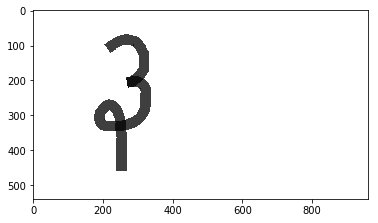

(28, 28)
(1, 1, 28, 28)


In [33]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/3.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		


(1, 1, 32, 26, 26)
(32, 26, 26)


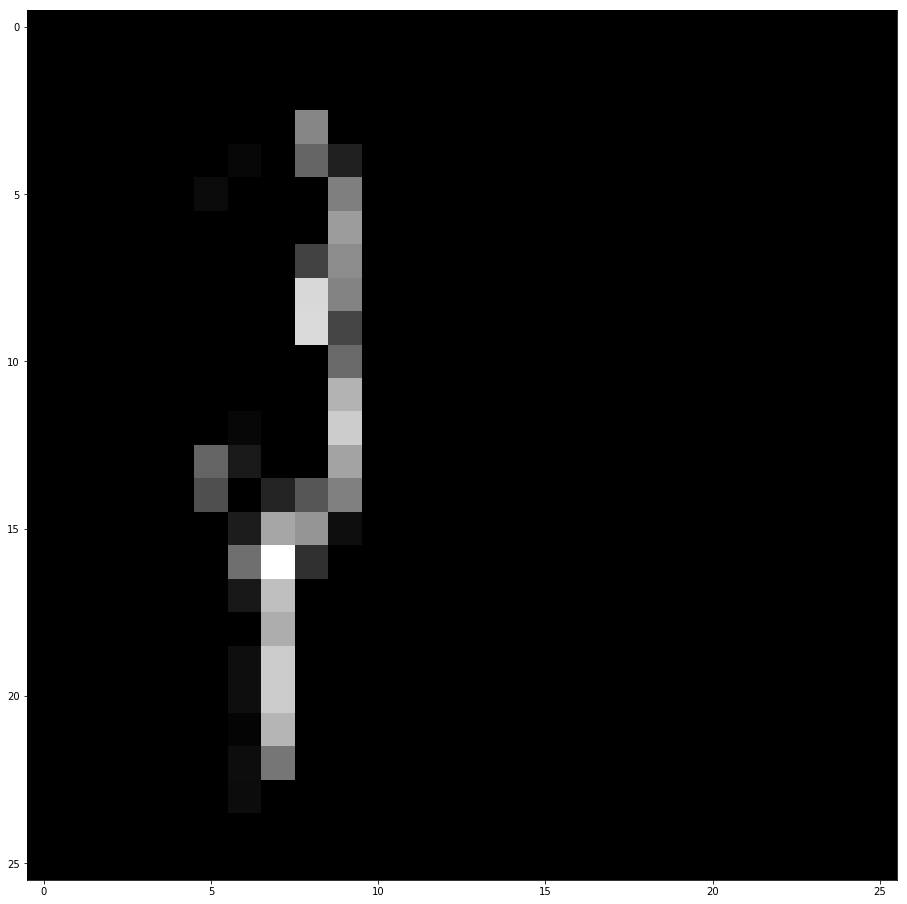

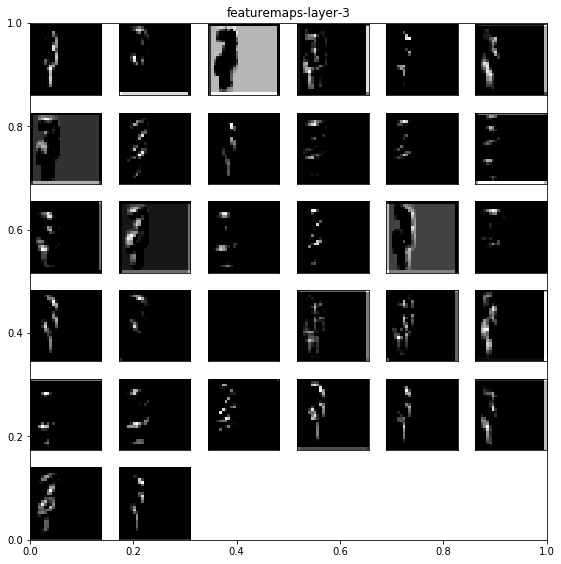

[[0.07 0.06 0.11 0.02 0.25 0.03 0.07 0.03 0.06 0.3 ]]
1/1 [==============================] - 0s
[9]


In [34]:
# Visualizing the intermediate layer

#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]  
# print (feature_maps)
print (np.shape(feature_maps))
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2, 0)),2, 0)
# print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

In [17]:
# serialize model to JSON
devaModel_json = model.to_json()
with open("devaModel.json", "w") as json_file:
    json_file.write(devaModel_json)
# serialize weights to HDF5
model.save_weights("devaModel.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
from keras.models import model_from_json
# load json and create model
json_file = open('devaModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("devaModel.h5")
print("Loaded model from disk")

Loaded model from disk


In [19]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 99.74%


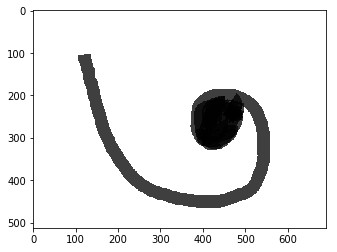

(28, 28)
(1, 1, 28, 28)
[[1.2605896e-04 2.1796690e-07 2.8624539e-08 3.1417076e-06 3.7306533e-04
  6.3175196e-07 6.2823492e-05 9.9932683e-01 2.8935523e-07 1.0702750e-04]]
1/1 [==============================] - 0s
[7]


In [20]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/digits/3_b.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((loaded_model.predict(test_image)))

print(loaded_model.predict_classes(test_image))